## Dividend cut prediction with visualization of Data

I have briefed about my approach to predict the Dividend cut. We will be more restrictive and work with more cleaner data and then will try to model it.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import mean_squared_error
from sklearn import linear_model
import seaborn as sns

from sklearn.metrics import mean_squared_error
from sklearn import linear_model
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.over_sampling import SMOTE
from imblearn.metrics import classification_report_imbalanced
import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

C:\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
df = pd.read_csv('ds_assessment_data_2008_2016.csv')

In [3]:
data = df.copy()

In [4]:
t_col = ['id','calendar_end','fiscal_year_end_year','Dividend','Dividend_returns','SALES','EPS','payout_ratio','debt_factor','profitability','financial_health_score']

In [5]:
c_data = data[t_col]

In [6]:
t_data = c_data.groupby('id').filter(lambda x: x.shape[0] >2)

In [7]:
t_data['div_cut']=0
t_data['Dividend_returns'] = t_data['Dividend_returns'].fillna(0)
t_data['div_cut'] = t_data['Dividend_returns'].apply(lambda x: 0 if x>=0.095 else 1)

C:\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexi

C:\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


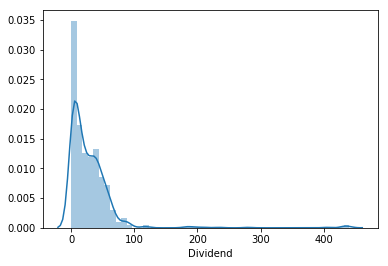

In [8]:
sns.distplot(t_data['Dividend'])

In [9]:
t_data=t_data[t_data['Dividend']<100] 

C:\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


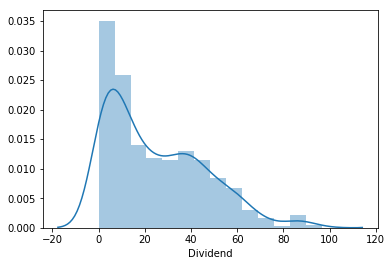

In [10]:
sns.distplot(t_data['Dividend'])

In [11]:
t_data['Dividend'] = np.log1p(t_data['Dividend'])

C:\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


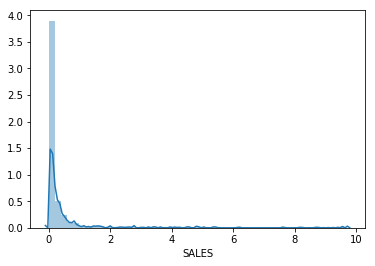

In [12]:
sns.distplot(t_data['SALES'].dropna())

In [13]:
t_data = t_data[t_data['SALES']<2]

C:\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


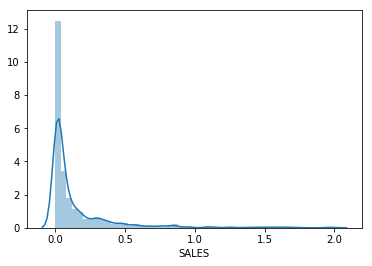

In [14]:
sns.distplot(t_data['SALES'].dropna())

In [15]:
t_data['SALES'] = np.log(t_data['SALES'])

C:\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


C:\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


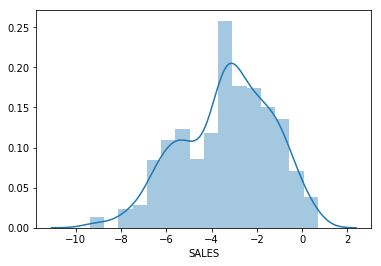

In [16]:
sns.distplot(t_data['SALES'].dropna())

C:\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


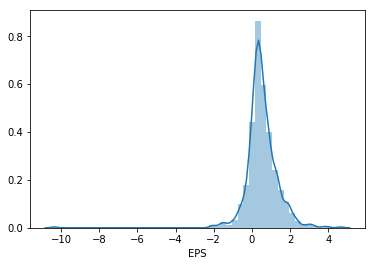

In [17]:
sns.distplot(t_data['EPS'].dropna())

C:\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


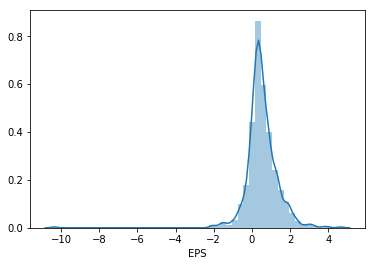

In [18]:
sns.distplot(t_data['EPS'].dropna())

In [19]:
t_data= t_data[(t_data['EPS']<4) & (t_data['EPS']>-3)]

C:\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


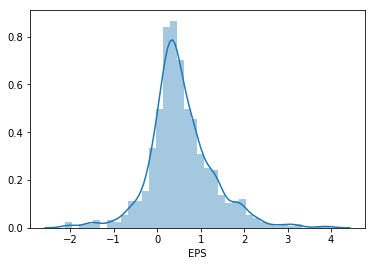

In [20]:
sns.distplot(t_data['EPS'].dropna())

In [21]:
t_data = t_data[t_data['payout_ratio']!=np.inf]

C:\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


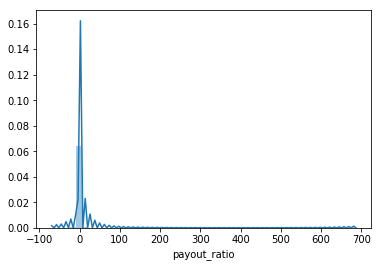

In [22]:
sns.distplot(t_data['payout_ratio'].dropna())

In [23]:
t_data = t_data[(t_data['payout_ratio']<20) & (t_data['payout_ratio']>-20)]

C:\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


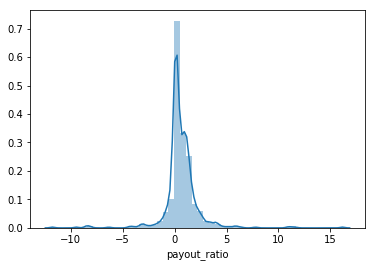

In [24]:
sns.distplot(t_data['payout_ratio'].dropna())

C:\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


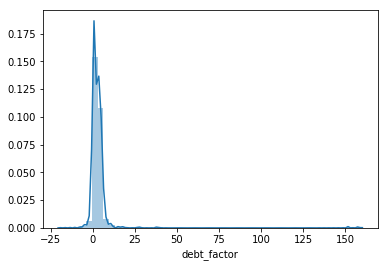

In [25]:
sns.distplot(t_data['debt_factor'].dropna())

In [26]:
t_data = t_data[t_data['debt_factor']<15]

C:\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


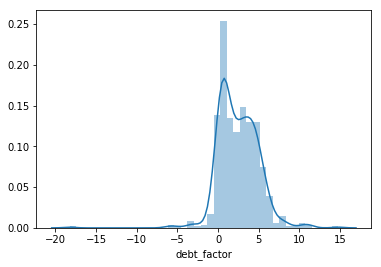

In [27]:
sns.distplot(t_data['debt_factor'].dropna())

C:\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


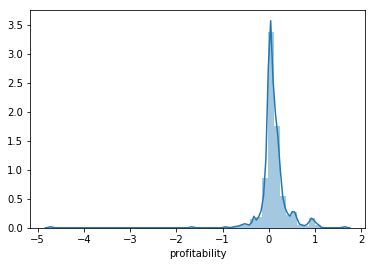

In [28]:
sns.distplot(t_data['profitability'].dropna())

In [29]:
t_data= t_data[(t_data['profitability']<0.75) & (t_data['profitability']>-0.75)]

C:\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


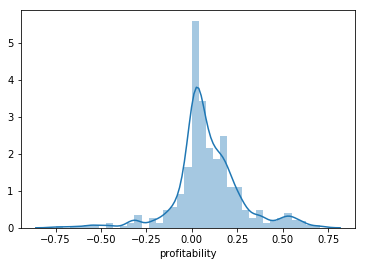

In [30]:
sns.distplot(t_data['profitability'].dropna())

In [31]:
t_data.shape

(578, 12)

In [32]:
t_data[:20]

,id,calendar_end,fiscal_year_end_year,Dividend,Dividend_returns,SALES,EPS,payout_ratio,debt_factor,profitability,financial_health_score,div_cut
10,c143,2011-12-31,2011,3.618323,0.000000,-3.305946,1.362247,0.446187,0.760288,0.164411,3.0,1
12,c143,2013-12-31,2013,3.842673,0.096697,-3.126663,1.216472,0.628788,1.155844,0.178408,3.0,0
14,c143,2015-12-31,2015,3.993603,0.076845,-3.096223,0.707095,1.261848,1.051846,0.168777,2.0,1
15,c143,2016-12-31,2016,3.707456,-0.253521,-3.259374,1.136044,0.586283,0.735535,0.175722,2.0,1
16,c144,2011-12-31,2011,2.710048,0.000000,-5.325191,-0.559644,-0.420060,3.102335,-0.047797,1.0,1
19,c144,2014-12-31,2014,3.648057,0.056497,-5.094002,-0.376878,-1.662784,10.610613,-0.313687,0.0,1
20,c144,2015-12-31,2015,3.658420,0.010695,-5.360052,-2.010697,-0.315000,10.513339,-0.539246,0.0,1
22,c145,2008-12-31,2008,2.104134,0.000000,-1.233887,1.772764,0.068053,1.201648,0.225273,3.0,1
23,c145,2009-12-31,2009,2.104134,0.000000,-1.720420,-0.375330,-0.321429,1.974152,-0.015000,2.0,1
24,c145,2010-12-31,2010,2.104134,0.000000,-1.521205,0.603209,0.200000,1.501849,0.069283,3.0,1


In [33]:
data = t_data.replace([np.inf, -np.inf], np.nan)
data = data.dropna()

In [34]:
data.shape

(567, 12)

Now since we have transformed the data as normal distribution, We can make use of Standard Scaler.

In [35]:
scaler = StandardScaler()

In [36]:
data[['SALES','EPS','payout_ratio','debt_factor','profitability']]=scaler.fit_transform(data.loc[:,['SALES','EPS','payout_ratio','debt_factor','profitability']])

In [37]:
data.head()

,id,calendar_end,fiscal_year_end_year,Dividend,Dividend_returns,SALES,EPS,payout_ratio,debt_factor,profitability,financial_health_score,div_cut
10,c143,2011-12-31,2011,3.618323,0.000000,-0.294289,0.991301,-0.116146,-0.789176,0.410088,3.0,1
12,c143,2013-12-31,2013,3.842673,0.096697,-0.186693,0.802334,-0.012103,-0.620327,0.484466,3.0,0
14,c143,2015-12-31,2015,3.993603,0.076845,-0.168424,0.142038,0.348605,-0.664720,0.433287,2.0,1
15,c143,2016-12-31,2016,3.707456,-0.253521,-0.266339,0.698077,-0.036322,-0.799742,0.470192,2.0,1
16,c144,2011-12-31,2011,2.710048,0.000000,-1.506137,-1.500014,-0.609720,0.210560,-0.717560,1.0,1


We can check for the correlation between features.I am using spearman correlation because it is more robust than pearson and it mitigates the effect of skewness and ouliers that we still have.

In [38]:
data[['SALES','EPS','payout_ratio','debt_factor','profitability']].corr(method='spearman').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,SALES,EPS,payout_ratio,debt_factor,profitability
SALES,1.0,0.3,-0.13,-0.14,-0.29
EPS,0.3,1.0,0.07,-0.45,0.52
payout_ratio,-0.13,0.07,1.0,0.38,0.28
debt_factor,-0.14,-0.45,0.38,1.0,-0.2
profitability,-0.29,0.52,0.28,-0.2,1.0


As per observation there is not much corr

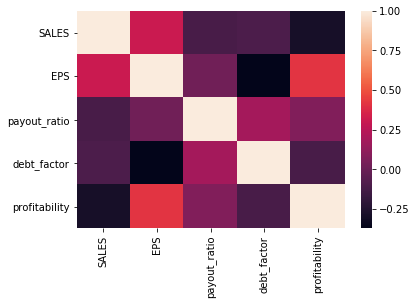

In [39]:
corr = data[['SALES','EPS','payout_ratio','debt_factor','profitability']].corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)


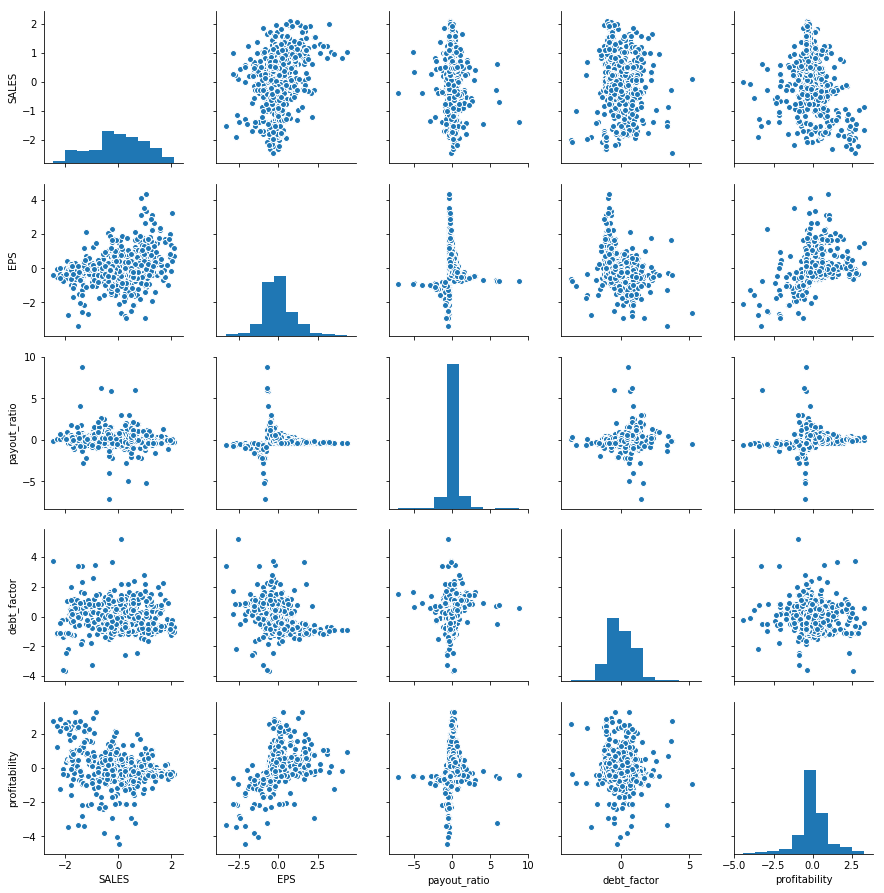

In [40]:
sns.pairplot(data[['SALES','EPS','payout_ratio','debt_factor','profitability']])

In [41]:
data.columns

Index(['id', 'calendar_end', 'fiscal_year_end_year', 'Dividend',
       'Dividend_returns', 'SALES', 'EPS', 'payout_ratio', 'debt_factor',
       'profitability', 'financial_health_score', 'div_cut'],
      dtype='object')

In [42]:
t_data = data.drop(['Dividend', 'Dividend_returns'],axis=1)

In [43]:
def  process_data(data):
    test_data = data[data['fiscal_year_end_year']==2016]
    train_data = data[data['fiscal_year_end_year']!=2016]
    
    train_data = train_data.drop('fiscal_year_end_year',axis=1)
    test_data = test_data.drop('fiscal_year_end_year',axis=1)
    
    X_train = train_data.drop(['id','calendar_end','div_cut'],axis=1)
    X_test = test_data.drop(['id','calendar_end','div_cut'],axis=1)
    
    y_train = train_data['div_cut']
    y_test = test_data['div_cut']
    
    return X_train,y_train,X_test,y_test

In [44]:
X_train,y_train,X_test,y_test = process_data(t_data)

In [45]:
X_train.columns

Index(['SALES', 'EPS', 'payout_ratio', 'debt_factor', 'profitability',
       'financial_health_score'],
      dtype='object')

In [46]:
models={}

In [47]:
def neural_nets(X_train, X_test, y_train, y_test):
    
    clf = MLPClassifier(hidden_layer_sizes=(100, 100, 100,))

    clf.fit(X_train, y_train)
    models['NN'] = clf
    #print("Score: ", clf.score(X_test, y_test))
    y_pred = clf.predict(X_test)
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    #print("F1 score is: {}".format(f1_score(y_test, y_pred)))
    #print("AUC Score is: {}".format(roc_auc_score(y_test, y_pred_proba)))
    
    
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)
    acc = clf.score(X_test, y_test)
    return f1,auc,acc


In [48]:
def randomForest(X_train, X_test, y_train, y_test):
    
    clf = RandomForestClassifier(max_depth=4, n_estimators=3)
    # clf = GridSearchCV(alg, parameters, n_jobs=4)
    clf.fit(X_train, y_train)
    models['RF'] = clf
    #print("Score: ", clf.score(X_test, y_test))
    y_pred = clf.predict(X_test)
    y_pred_proba = clf.predict_proba(X_test)[:, 1]

    #print("F1 score is: {}".format(f1_score(y_test, y_pred)))
    #print("AUC Score is: {}".format(roc_auc_score(y_test, y_pred_proba)))
    #print(np.count_nonzero(y_test),np.count_nonzero(y_pred))
    
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)
    acc = clf.score(X_test, y_test)
    return f1,auc,acc


In [49]:
def logistic_regression(X_train, X_test, y_train, y_test):
    
    clf = LogisticRegression(C=1e5)
    clf.fit(X_train, y_train)
    models['LR'] = clf
    #print("Score: ", clf.score(X_test, y_test))
    y_pred = clf.predict(X_test)
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    #print("F1 score is: {}".format(f1_score(y_test, y_pred)))
    #print("AUC Score is: {}".format(roc_auc_score(y_test, y_pred_proba)))
    #print(np.count_nonzero(y_test),np.count_nonzero(y_pred))
    
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)
    acc = clf.score(X_test, y_test)
    return f1,auc,acc


In [50]:
def logistic_with_smote(X_train, X_test, y_train, y_test):
    
    clf = LogisticRegression(C=1e5)
    clf.fit(X_train, y_train)
    models['LS'] = clf
    # build model with SMOTE imblearn
    smote_pipeline = make_pipeline_imb(SMOTE(random_state=4), clf)

    smote_model = smote_pipeline.fit(X_train, y_train)
    smote_prediction = smote_model.predict(X_test)
    smote_prediction_proba = smote_model.predict_proba(X_test)[:, 1]

    #print(classification_report_imbalanced(y_test, smote_prediction))
    #print('SMOTE Pipeline Score {}'.format(smote_pipeline.score(X_test, y_test)))
    #print("SMOTE AUC score: ", roc_auc_score(y_test, smote_prediction_proba))
    #print("SMOTE F1 Score: ", f1_score(y_test, smote_prediction))
    #print(np.count_nonzero(y_test),np.count_nonzero(smote_prediction))
    
    acc=smote_pipeline.score(X_test, y_test)
    f1 = f1_score(y_test, smote_prediction)
    auc = roc_auc_score(y_test, smote_prediction_proba)
    
    return f1,auc,acc


In [51]:
def xgb_classifier(X_train, X_test, y_train, y_test, useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    alg = XGBClassifier(learning_rate=0.1, n_estimators=140, max_depth=5,
                        min_child_weight=3, gamma=0.2, subsample=0.6, colsample_bytree=1.0,
                        objective='binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(X_train.values, label=y_train.values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
                          early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])

    alg.fit(X_train, y_train, eval_metric='auc')
    models['XGB'] = alg
    predictions = alg.predict(X_test)
    pred_proba = alg.predict_proba(X_test)[:, 1]

    #print("Accuracy : %.4g" % metrics.accuracy_score(y_test, predictions))
   #print("AUC: %f" % metrics.roc_auc_score(y_test, pred_proba))
    #print("F1 Score: %f" % metrics.f1_score(y_test, predictions))

    #print(np.count_nonzero(y_test),np.count_nonzero(predictions))
    
    acc=metrics.accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    auc = roc_auc_score(y_test, pred_proba)
    
    return f1,auc,acc


In [52]:
def execute_models(X_train, X_test, y_train, y_test):
    Algo, AUC, F1, Accuracy =[],[],[],[]

    Algo.append('Neural Nets')
    f,a,acc = neural_nets(X_train, X_test, y_train, y_test)
    AUC.append(a)
    F1.append(f)
    Accuracy.append(acc)


    Algo.append('Random Forrest')
    f,a,acc =randomForest(X_train, X_test, y_train, y_test)
    AUC.append(a)
    F1.append(f)
    Accuracy.append(acc)

    Algo.append('Logistic Regression')
    f,a,acc = logistic_regression(X_train, X_test, y_train, y_test)
    AUC.append(a)
    F1.append(f)
    Accuracy.append(acc)

    Algo.append('Logistic wih Smote')
    f,a,acc = logistic_with_smote(X_train, X_test, y_train, y_test)
    AUC.append(a)
    F1.append(f)
    Accuracy.append(acc)

    Algo.append('XGB')
    f,a,acc = xgb_classifier(X_train, X_test, y_train, y_test)
    AUC.append(a)
    F1.append(f)
    Accuracy.append(acc)

    result = pd.DataFrame({'Algo':Algo,'Accuracy':Accuracy,'AUC':AUC,'F1 Score':F1})
    
    return result

In [53]:
Results_1 =execute_models(X_train, X_test, y_train, y_test)

C:\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


As we have seen before in correlation plot that there is significant correlation betwen EPS and profitbility, we can try with dropping  EPS and comparee the result

In [54]:
t_data = data.drop(['Dividend', 'Dividend_returns','EPS'],axis=1)

X_train,y_train,X_test,y_test = process_data(t_data)
Results_2 =execute_models(X_train, X_test, y_train, y_test)

C:\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [55]:
Results_1

,Algo,Accuracy,AUC,F1 Score
0,Neural Nets,0.734940,0.807143,0.816667
1,Random Forrest,0.746988,0.731746,0.834646
2,Logistic Regression,0.795181,0.853175,0.875912
3,Logistic wih Smote,0.759036,0.850794,0.824561
4,XGB,0.819277,0.830556,0.883721


In [56]:
Results_2

,Algo,Accuracy,AUC,F1 Score
0,Neural Nets,0.795181,0.838889,0.857143
1,Random Forrest,0.771084,0.777381,0.850394
2,Logistic Regression,0.819277,0.854762,0.888889
3,Logistic wih Smote,0.771084,0.857143,0.834783
4,XGB,0.819277,0.839286,0.885496


As we can see there is significant improvement in the result after we drop correlated feature EPS. We can go on analyzing the feature and improving hyperparameters to get better result but I have to build an approach in constrained time. So I will leaving further analysis for further research of data. In next approach I will try to use most of the features given with dataset. 

In [57]:
import pickle

In [58]:
#xgb = models['LR']
Input_Features   = ['ASSETS', 'EBIT', 'EPS_GAAP', 'FCF', 'FCFPS', 'INT_EXP', 'SALES','TAX_EXPENSE', 'DEPR_AMORT_returns', 'financial_health_score']

In [59]:
# save the model to disk
for k,v in models.items():
    filename = './models/Div_Prediction_'+k+'_model_2.0.sav'
    pickle.dump(v, open(filename, 'wb'))
 

### Models are in models folder. Please use followin feature to test the model:
### Input features = SALES, EPS, payout_ratio, debt_factor, profitability,  financial_health_score